In [82]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import utils

In [83]:
# Load MNIST Fashion dataset
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

x_train = utils.preprocess(x_train)
x_test = utils.preprocess(x_test)

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [76]:
# Autoencoder model definition
class Autoencoder(keras.models.Model):
    def __init__(self, latent_dims, input_shape):
        super(Autoencoder, self).__init__()
        
        self.latent_dims = latent_dims
        self.image_shape = input_shape
        
        # Encoder model
        self.encoder = keras.Sequential([
            keras.layers.Flatten(),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(self.latent_dims, activation='relu')
        ])
        
        # Decoder model
        self.decoder = keras.Sequential([
            keras.layers.Dense(
                np.prod(np.array(self.image_shape), axis=0, dtype=np.uint32), 
                activation="sigmoid"
            ),
            keras.layers.Reshape(self.image_shape)
        ])
    
    def call(self, x):
        # Encode input
        encoded = self.encoder(x)
        
        # Decode input
        decoded = self.decoder(encoded)
        
        return decoded

In [77]:
# Constants definition
LATENT_DIMS = 64
INPUT_SHAPE = x_train.shape[1:]
EPOCHS = 10

In [78]:
# Initialize Autoencoder model
autoencoder = Autoencoder(latent_dims=LATENT_DIMS, input_shape=INPUT_SHAPE)

# Compile model
autoencoder.compile(
    optimizer='adam',
    loss='mse'
)

# Train model
history = autoencoder.fit(
    x_train,
    x_train,
    epochs=EPOCHS,
    shuffle=True,
    validation_data=(x_test, x_test)
).history

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0207 - val_loss: 0.0126
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0113 - val_loss: 0.0104
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0086 - val_loss: 0.0086
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0081 - val_loss: 0.0083
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

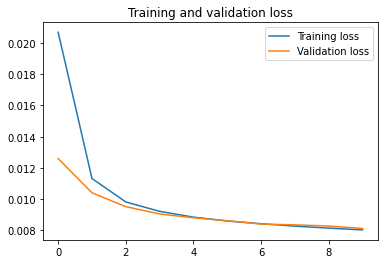

In [79]:
# Plot loss curve
plt.plot(range(EPOCHS), history['loss'], label='Training loss')
plt.plot(range(EPOCHS), history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [80]:
# Generate images on test set
encoded_images = autoencoder.encoder(x_test).numpy()
decoded_images = autoencoder.decoder(encoded_images).numpy()

decoded_images.shape

(10000, 28, 28)

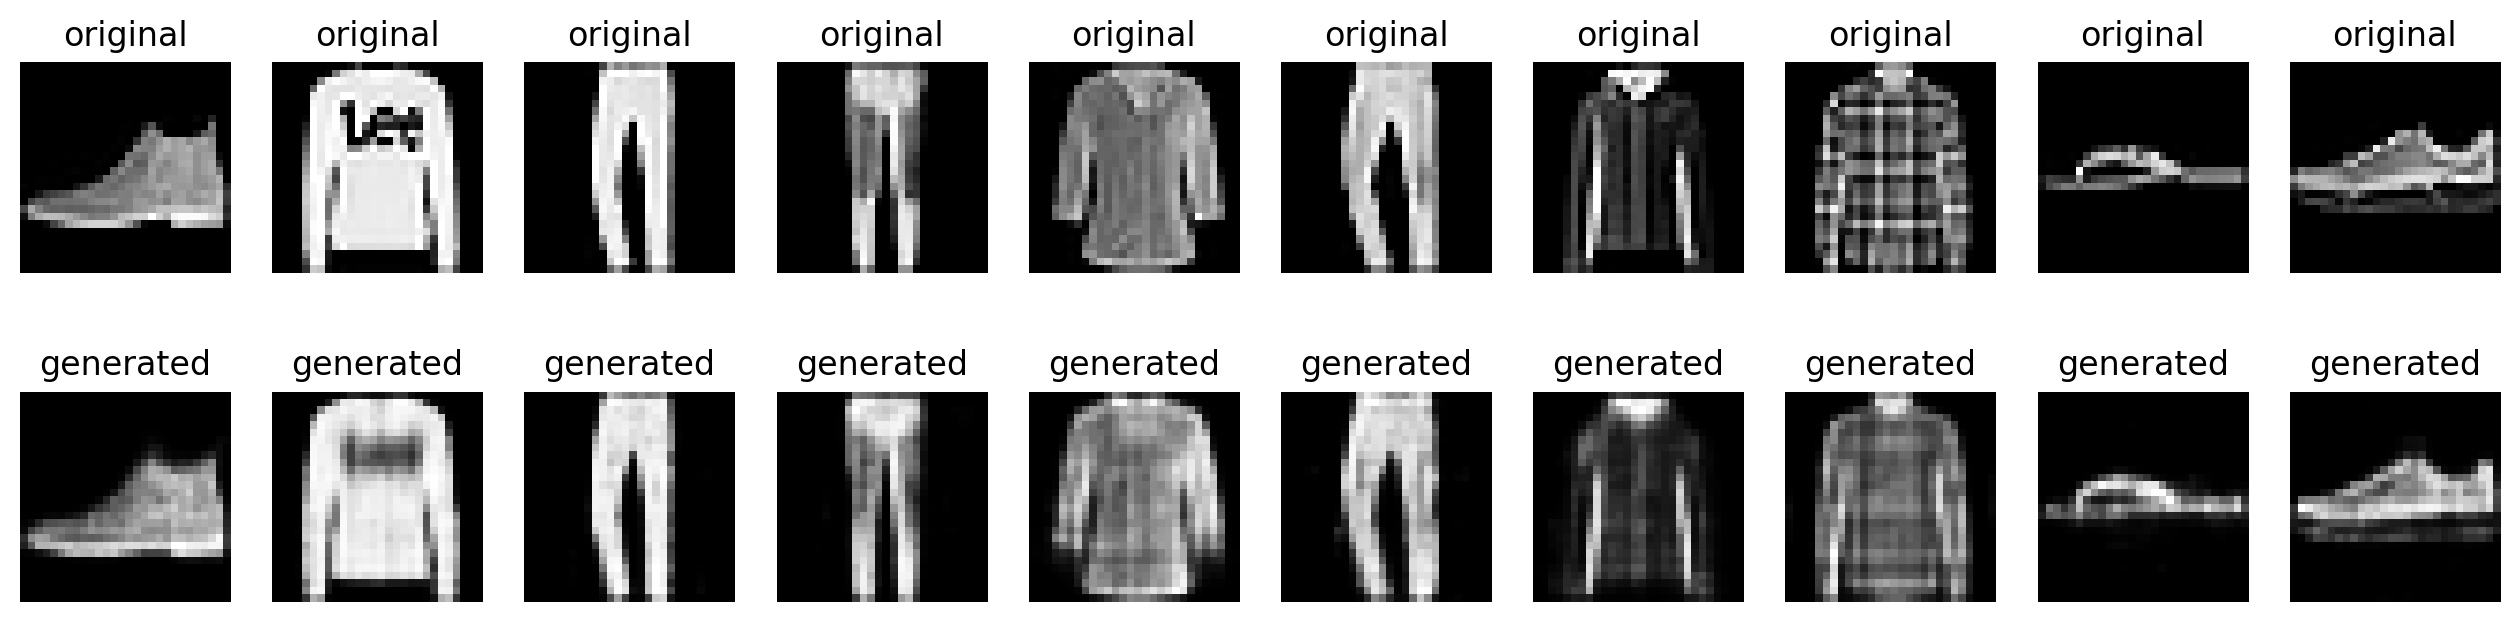

In [81]:
# Plot the results
n = 10

plt.figure(figsize=(16, 4), dpi=200)

for i in range(n):
    # Plot original images in row 1
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title('original')
    plt.axis('off')
    
    # Plot generated images in row 2
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i])
    plt.title('generated')
    plt.axis('off')